In [1]:
import sys
import os
import nltk
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from urllib.parse import urlparse

=== Top 10 Publishers by Article Count ===


,Publisher,Article_Count
0,Benzinga Newsdesk,5697
1,Vick Meyer,1453
2,Lisa Levin,810
3,vishwanath@benzinga.com,704
4,Benzinga_Newsdesk,671
5,Benzinga Insights,595
6,Charles Gross,234
7,Benzinga Newsdesk,190
8,Luke J Jacobi,110
9,Shanthi Rexaline,108


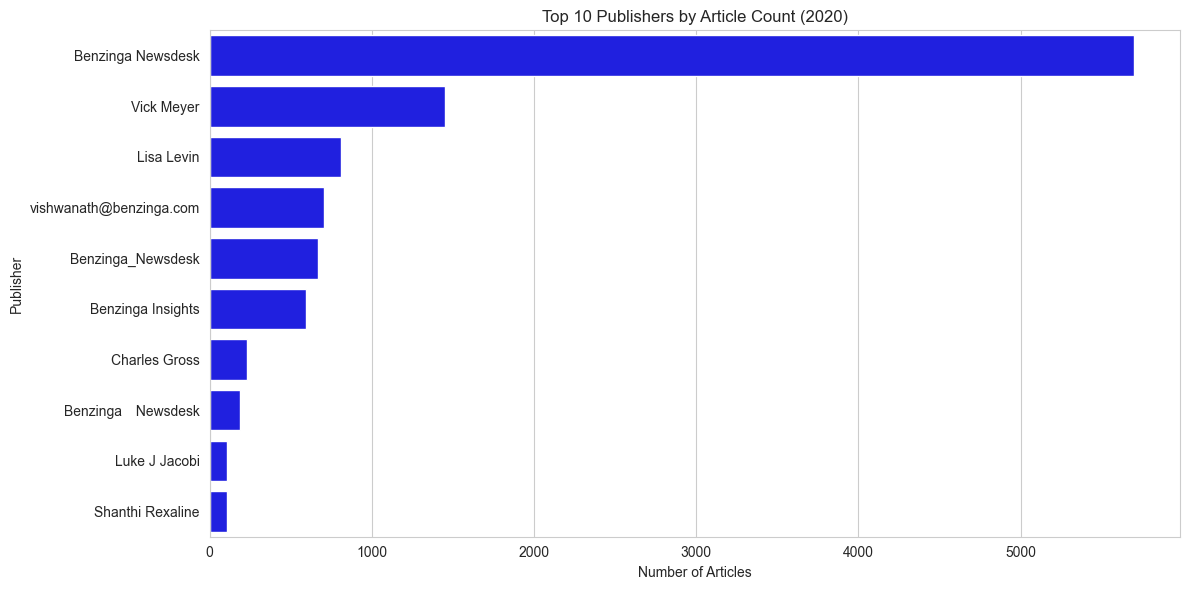


=== Top 10 Email Domains by Article Count ===


,Email_Domain,Article_Count
0,www.benzinga.com,11249


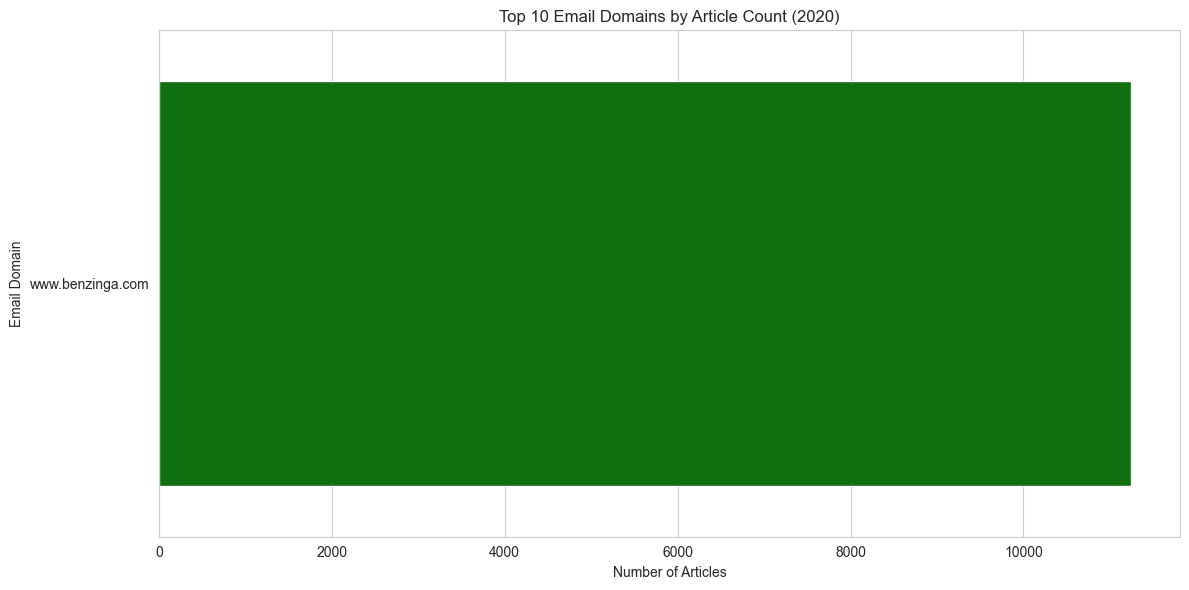


=== News Types Distribution ===


,News_Type,Article_Count
0,other,4282
1,analyst,3504
2,market,2283
3,earnings,967
4,product,213


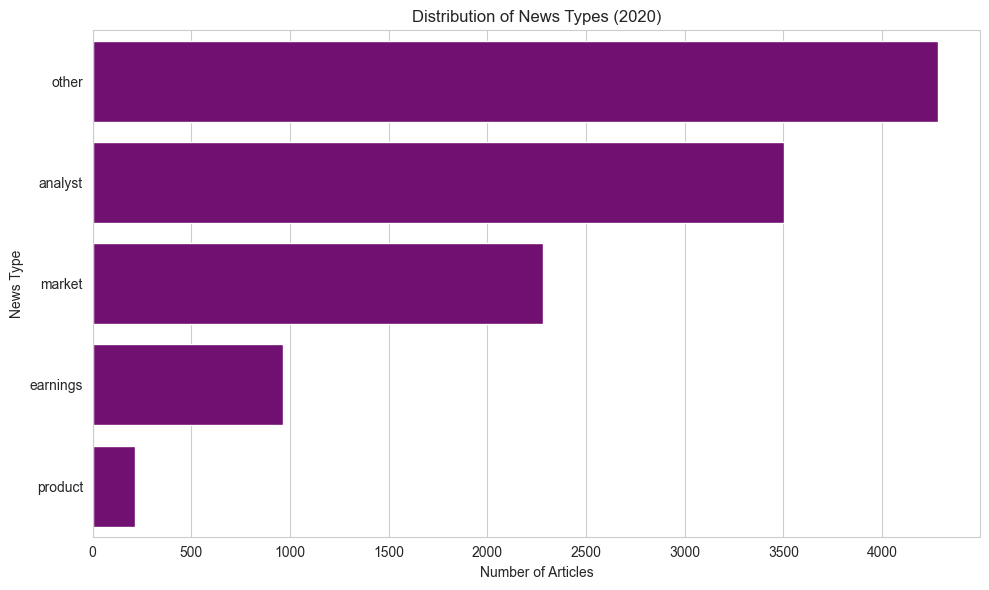


=== News Types by Top 5 Publishers ===


news_type,analyst,earnings,market,other,product
publisher,,,,,
Benzinga Newsdesk,501,351,1163,3510,172
Benzinga_Newsdesk,655,10,0,6,0
Lisa Levin,121,119,459,110,1
Vick Meyer,1429,22,0,2,0
vishwanath@benzinga.com,696,8,0,0,0


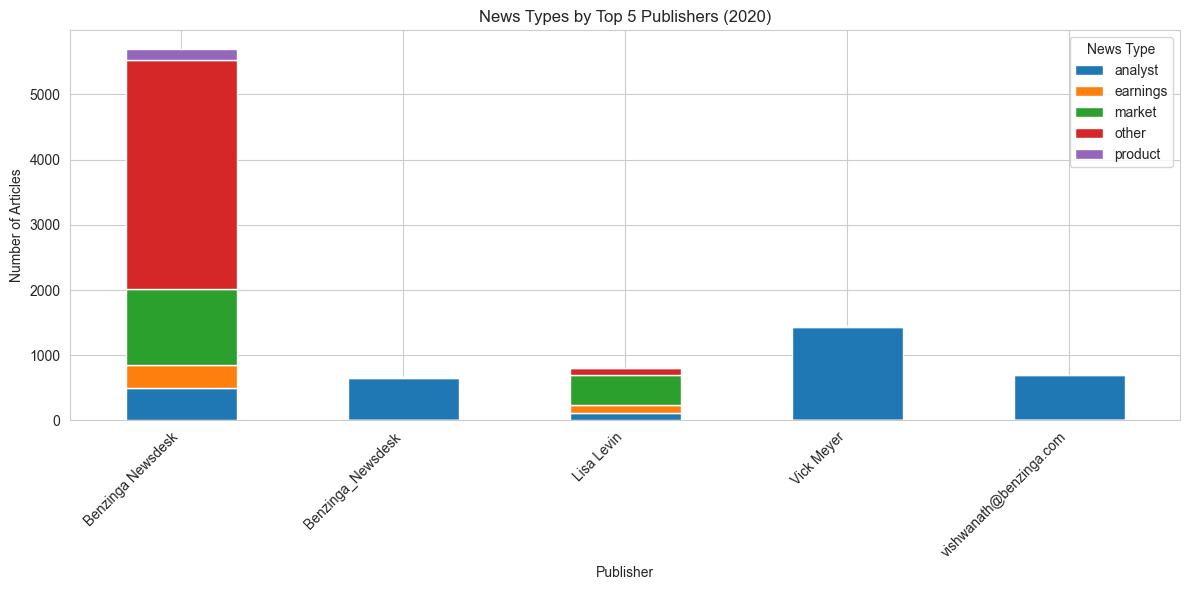

In [2]:

# ---
# title: Publisher Analysis for 2020 Financial News Dataset
# description: Notebook to analyze publisher contributions and news types
# ---

# ### 1. Adjust Python Path
# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.publisher_utils import extract_email_domain, categorize_news_type

# Set plot style
sns.set_style("whitegrid")

# ### 2. Load Cleaned News Dataset
news_columns = ['headline', 'url', 'publisher', 'date', 'date_only', 'stock']
news_df = pd.read_csv('../data/fnspid_news_cleaned_2020.csv')
for col in news_columns:
    if col not in news_df.columns:
        raise ValueError(f"Missing column: {col}")

# Convert date_only to datetime
news_df['date_only'] = pd.to_datetime(news_df['date_only'])

# Derive publisher_domain from url (as a fallback since it's not in the dataset)
news_df['publisher_domain'] = news_df['url'].apply(lambda x: urlparse(x).netloc if pd.notnull(x) else None)

# ### 3. Publisher Contribution Analysis
# Count articles per publisher
publisher_counts = news_df['publisher'].value_counts().reset_index()
publisher_counts.columns = ['Publisher', 'Article_Count']
print("=== Top 10 Publishers by Article Count ===")
display(publisher_counts.head(10))

# Visualize top 10 publishers
plt.figure(figsize=(12, 6))
sns.barplot(x='Article_Count', y='Publisher', data=publisher_counts.head(10), color='blue')
plt.title('Top 10 Publishers by Article Count (2020)')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.savefig('task-1-plots/publisher_counts_2020.png')
plt.show()

# ### 4. Email Domain Analysis
# Extract email domains (using publisher as fallback if url-derived domain is missing)
news_df = extract_email_domain(news_df, publisher_column='publisher', domain_column='publisher_domain')
domain_counts = news_df['email_domain'].value_counts().reset_index()
domain_counts.columns = ['Email_Domain', 'Article_Count']
print("\n=== Top 10 Email Domains by Article Count ===")
display(domain_counts.head(10))

# Visualize top 10 email domains
plt.figure(figsize=(12, 6))
sns.barplot(x='Article_Count', y='Email_Domain', data=domain_counts.head(10), color='green')
plt.title('Top 10 Email Domains by Article Count (2020)')
plt.xlabel('Number of Articles')
plt.ylabel('Email Domain')
plt.tight_layout()
plt.savefig('task-1-plots/email_domain_counts_2020.png')
plt.show()

# ### 5. News Type Categorization
# Categorize news types
news_df = categorize_news_type(news_df, text_column='headline')
type_counts = news_df['news_type'].value_counts().reset_index()
type_counts.columns = ['News_Type', 'Article_Count']
print("\n=== News Types Distribution ===")
display(type_counts)

# Visualize news types
plt.figure(figsize=(10, 6))
sns.barplot(x='Article_Count', y='News_Type', data=type_counts, color='purple')
plt.title('Distribution of News Types (2020)')
plt.xlabel('Number of Articles')
plt.ylabel('News Type')
plt.tight_layout()
plt.savefig('task-1-plots/news_type_distribution_2020.png')
plt.show()

# ### 6. News Types by Top Publishers
# Analyze news types for top 5 publishers
top_publishers = publisher_counts['Publisher'].head(5).tolist()
type_by_publisher = news_df[news_df['publisher'].isin(top_publishers)].groupby(['publisher', 'news_type']).size().unstack(fill_value=0)
print("\n=== News Types by Top 5 Publishers ===")
display(type_by_publisher)

# Visualize news types by publisher
type_by_publisher.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('News Types by Top 5 Publishers (2020)')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.legend(title='News Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('task-1-plots/news_type_by_publisher_2020.png')
plt.show()

# ### 7. Save Results
publisher_counts.to_csv('../data/publisher_counts_2020.csv', index=False)
domain_counts.to_csv('../data/email_domain_counts_2020.csv', index=False)
type_counts.to_csv('../data/news_type_counts_2020.csv', index=False)
type_by_publisher.to_csv('../data/news_type_by_publisher_2020.csv')